In [40]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense ,Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing import image
from keras.models import Model
#import pyplot as plt

In [36]:
batch_size=128
num_classes=10
epochs=2
(x_train,y_train),(x_test,y_test)=mnist.load_data()

x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [37]:
x_train/=255
x_test/=255
print(x_train.shape[0],'train samples')
print(x_test.shape[0], 'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


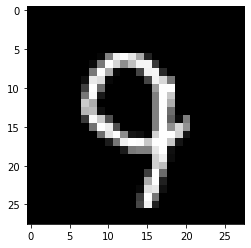

In [38]:

print("Label:",y_test[999:1000])
plt.imshow(x_test[999:1000].reshape(28,28),cmap='gray')
plt.show()

shape of first layer (784, 32)
visualisation of first layer


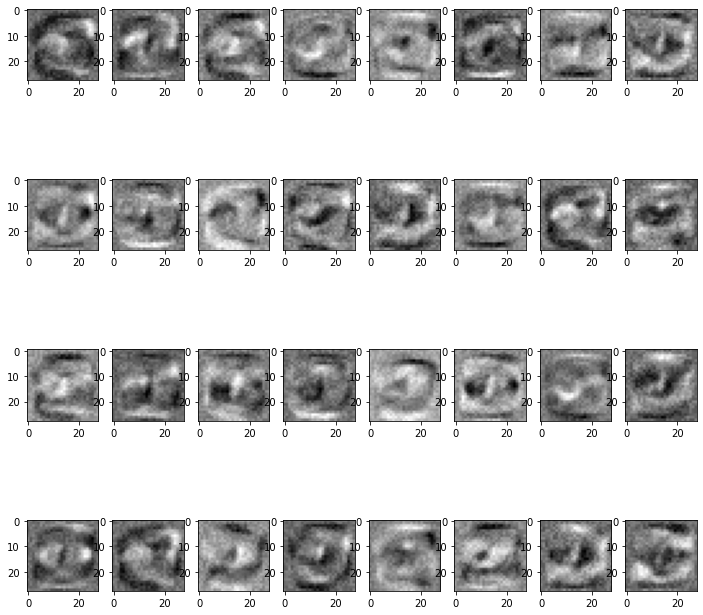

In [48]:
w=[]
for layer in model.layers:
    weights=layer.get_weights()
    w.append(weights)
layer1=np.array(w[0][0])
print("shape of first layer",layer1.shape)
print("visualisation of first layer")
fig=plt.figure(figsize=(12,12))
columns=8
rows=int(first_layer_size/8)

for i in range(1,columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()    

In [41]:
first_layer_size=32
model=Sequential()
model.add(Dense(first_layer_size,activation='sigmoid',input_shape=(784,)))
model.add(Dense(first_layer_size,activation='sigmoid'))
model.add(Dense(first_layer_size,activation='sigmoid'))
model.add(Dense(num_classes,activation ='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [43]:
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/2
469/469 [==============================] - 5s 4ms/step - loss: 2.0163 - accuracy: 0.3955
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.7246 - accuracy: 0.8338


In [44]:
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss',score[0])
print('Test accuracy:', score[1])


test loss 0.4564186632633209
Test accuracy: 0.8819000124931335


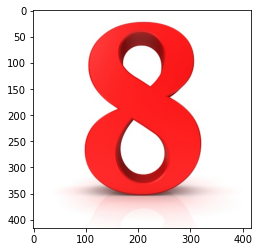

In [45]:
#giving user input to predict the img

import cv2
import numpy as np
from matplotlib import pyplot as plt
image_bgr=cv2.imread("C:/Users/Jey Sreehar/Downloads/8.jpg",cv2.IMREAD_COLOR)
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

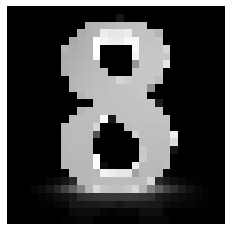

In [46]:
from PIL import Image,ImageChops
#img=Image.open('C:/Users/Jey Sreehar/Downloads/8.jpg')

image=cv2.imread('C:/Users/Jey Sreehar/Downloads/8.jpg',cv2.IMREAD_GRAYSCALE)
image_resized=cv2.resize(image,(28,28))
image_resized=cv2.bitwise_not(image_resized)
#image_resized1=ImageChops.invert(image_resized)
plt.imshow(image_resized,cmap='gray'),plt.axis("off")
plt.show()

In [47]:
prediction= model.predict(image_resized.reshape(1,784))
print("prediction score:\n",prediction[0])
thresholded=(prediction>0.5)*1
print("\nThresholded score:\n",thresholded[0])
print("\npredicted digit:\n",np.where(thresholded==1)[1][0])

prediction score:
 [4.5449906e-03 9.6665826e-03 8.6165822e-01 7.8851856e-02 9.8412609e-05
 2.3924462e-03 2.2915073e-02 1.8565552e-02 1.0856853e-03 2.2115296e-04]

Thresholded score:
 [0 0 1 0 0 0 0 0 0 0]

predicted digit:
 2
